# Fundamentals of Social Data Science 
## Week 2 Day 2 Lab: Exploring Time Series Data

Today we will make use of the `wiki-time-plots.py` script. This has been pushed now to the oii-fsds-wikipedia repository. You should be able to fetch it to your repo the same way that you fetched the files for the previous lab. 

With your downloaded DataFrames, use these scripts in order to view the edit history over time. By default this script will simply view a count of edit history. It will need further processing if you wish to choose another column. For your presentation on Monday, please consider what word, phrase, or feature of the revisions you wish to show over time. You will also need to consider how you can plot two distributions. The moving average code will plot the revisions and the moving average. You can use this to help understand how to plot to separate revisions. 

You are welcome to use AI tools in order to assist you in drafting this code. However, your group will be responsible for the code regardless of its provenance. "A poor worker blames their tools". 

Draw upon your group's potential expertise in social science to come up with a theoretically informed rationale for a given comparison. 


Some steps to consider with your code:
- Create a new function that extracts a feature. 
- Plot that feature in a similar way as the raw count moving average.
- Understand how to use this code either in Jupyter (i.e. VS Code) or as a script. 
- I will demonstrate the use of `%autoreload` in class. 

You can use the script below if you wish in order to run the commands directly within a Jupyter notebook rather than via that terminal. 

In [1]:
# Load the extension 

# Load the autoreload extension --> Automatically reload imported modules whenever their source code is changed
%load_ext autoreload

# Set the autoreload mode to 2 --> Ensure that all modules will be reloaded automatically before each execution of a code cell
%autoreload 2


# Import the module
import wiki_time_plots as wtp

import os


In [2]:

import os

# os.system('pip install pandas && pip freeze > requirements.txt');
# os.system('pip install requests && pip freeze > requirements.txt');
# os.system('pip install bs4 && pip freeze > requirements.txt');
# os.system('pip install pathlib && pip freeze > requirements.txt');
# os.system('pip install datetime && pip freeze > requirements.txt');
# os.system('pip install tqdm && pip freeze > requirements.txt');
# os.system('pip install argparse && pip freeze > requirements.txt');
# os.system('pip install lxml && pip freeze > requirements.txt');
# os.system('pip install pyarrow && pip freeze > requirements.txt');
# os.system('pip install matplotlib && pip freeze > requirements.txt');
# os.system('pip install seaborn && pip freeze > requirements.txt');
# os.system('pip install pathlib && pip freeze > requirements.txt');

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

## Download Data from Wikipedia and covert into DataFrame

In [3]:
# Define articles we want to download
article1 = "Liz Truss"
article2 = "Liz Truss lettuce"

In [4]:
# Create necessary directories if they don't exist (if it exists it won't overwrite or throw an error)
os.makedirs("data", exist_ok=True)
os.makedirs("DataFrames", exist_ok=True)

In [5]:
# Download revisions for both articles
# Using `os.system(<code>)` allows us to execute code as if in terminal
# Note that download_wiki_revisions.py already has the import packages functions 
    # We just need to make sure that they are in the terminal

print("Downloading revisions for first article...")
os.system(f'python download_wiki_revisions.py "{article1}"') 
print("\nDownloading revisions for second article...")
os.system(f'python download_wiki_revisions.py "{article2}"')

Found 4507 revisions. Organizing into directory structure...


100%|██████████| 4507/4507 [00:17<00:00, 264.02it/s]



Final revision counts:
Found 4507 total revisions for 'Liz Truss'.

Breakdown by year:
  2010: 50 revisions
  2011: 21 revisions
  2012: 56 revisions
  2013: 40 revisions
  2014: 44 revisions
  2015: 55 revisions
  2016: 160 revisions
  2017: 110 revisions
  2018: 33 revisions
  2019: 204 revisions
  2020: 141 revisions
  2021: 205 revisions
  2022: 2327 revisions
  2023: 736 revisions
  2024: 325 revisions



Found 351 revisions. Organizing into directory structure...


 62%|██████▏   | 216/351 [00:00<00:00, 750.21it/s]


Final revision counts:
Found 351 total revisions for 'Liz Truss lettuce'.

Breakdown by year:
  2022: 247 revisions
  2023: 56 revisions
  2024: 48 revisions


100%|██████████| 351/351 [00:00<00:00, 765.48it/s]


0

In [6]:
# Convert all downloaded revisions to DataFrames
print("\nConverting revisions to DataFrames...")
os.system('python xml_to_dataframe.py --data-dir ./data --output-dir ./DataFrames')


Converting revisions to DataFrames...
Processing with text length only


Processing Data_science:   0%|          | 0/2 [00:00<?, ?batch/s]


Summary for Machine_learning:
Total revisions: 3887
Date range: 2003-05-25 06:03:17+00:00 to 2024-10-21 15:03:51+00:00
Unique contributors: 1098
Average text length: 59622.2 characters


Processing Singapore:   0%|          | 0/1 [00:00<?, ?batch/s]


Summary for Data_science:
Total revisions: 1709
Date range: 2012-04-11 17:34:10+00:00 to 2024-09-04 22:32:11+00:00
Unique contributors: 466
Average text length: 19660.1 characters


Processing Liz Truss:   0%|          | 0/5 [00:00<?, ?batch/s]


Summary for Singapore:
Total revisions: 1000
Date range: 2021-08-08 10:07:14+00:00 to 2024-10-21 11:34:25+00:00
Unique contributors: 352
Average text length: 286322.4 characters


Processing Liz Truss lettuce:   0%|          | 0/1 [00:00<?, ?batch/s]


Summary for Liz Truss:
Total revisions: 4507
Date range: 2010-05-07 17:01:43+00:00 to 2024-10-25 14:54:55+00:00
Unique contributors: 1050
Average text length: 126434.5 characters

Summary for Liz Truss lettuce:
Total revisions: 351
Date range: 2022-10-20 14:52:50+00:00 to 2024-10-25 15:21:33+00:00
Unique contributors: 127
Average text length: 20979.8 characters


Processing Liz Truss lettuce: 100%|██████████| 1/1 [00:00<00:00,  4.22batch/s]


0

# Load the data

In [7]:
# Load the data
df_liz = wtp.load_wiki_data('DataFrames/Liz Truss.feather')

df_lettuce = wtp.load_wiki_data('DataFrames/Liz Truss lettuce.feather')

# Group the data

In [8]:
# Grouping

import calendar
from calendar import day_abbr

# Group by Day
lettuce_df_day=df_lettuce[["revision_id","timestamp"]].resample("D",on="timestamp").count().reset_index()
lettuce_df_day=lettuce_df_day.rename(columns={"revision_id": "Frequency"})

liz_truss_df_day=df_liz[["revision_id","timestamp"]].resample("D",on="timestamp").count().reset_index()
liz_truss_df_day=liz_truss_df_day.rename(columns={"revision_id": "Frequency"})

# Group by Week
lettuce_df_week=df_lettuce[["revision_id","timestamp"]].resample("W",on="timestamp").count().reset_index()
lettuce_df_week=lettuce_df_week.rename(columns={"revision_id": "Frequency"})

liz_truss_df_week=df_liz[["revision_id","timestamp"]].resample("W",on="timestamp").count().reset_index()
liz_truss_df_week=liz_truss_df_week.rename(columns={"revision_id": "Frequency"})

# Group by Month
lettuce_df_month=df_lettuce[["revision_id","timestamp"]].resample("ME",on="timestamp").count().reset_index()
lettuce_df_month=lettuce_df_month.rename(columns={"revision_id": "Frequency"})

liz_truss_df_month=df_liz[["revision_id","timestamp"]].resample("ME",on="timestamp").count().reset_index()
liz_truss_df_month=liz_truss_df_month.rename(columns={"revision_id": "Frequency"})


# General plot of the data (Daily, Weekly, Monthly)

### Fig 1. Daily revisions of "Liz Truss lettuce" and "Liz Truss" on Wikipedia in the year 2022: YYYY-MM')

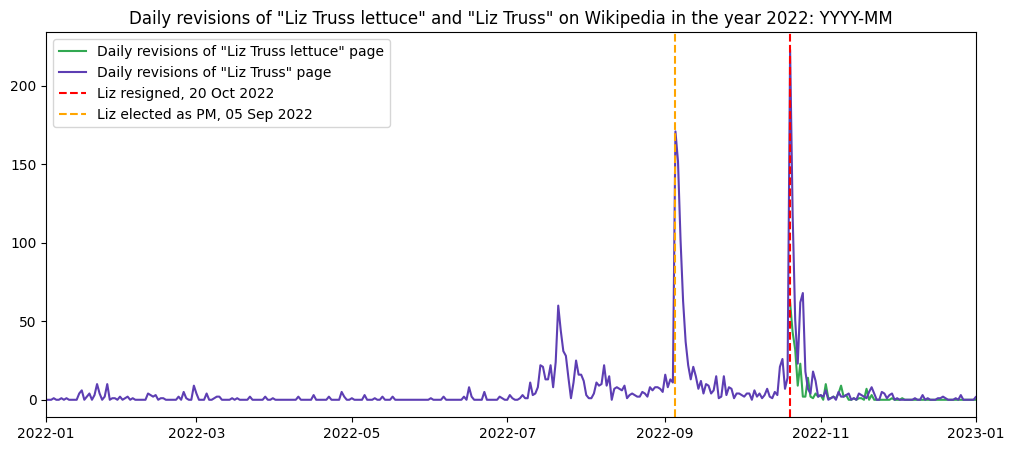

In [128]:
# Daily

plt.figure(figsize = (12,5))

plt.plot(lettuce_df_day["timestamp"], lettuce_df_day["Frequency"], label = 'Daily revisions of "Liz Truss lettuce" page', color="#32a852")
plt.plot(liz_truss_df_day["timestamp"], liz_truss_df_day["Frequency"], label = 'Daily revisions of "Liz Truss" page', color ="#5d3eb3")

plt.xlim(pd.Timestamp("2022-01-01"), pd.Timestamp("2023-01-01"))

plt.title('Daily revisions of "Liz Truss lettuce" and "Liz Truss" on Wikipedia in the year 2022: YYYY-MM')

# Plot a vertical line showing the day Liz resigned (20 Oct 2022)
plt.axvline(pd.Timestamp("2022-10-20"), color ="red", linestyle="--", label = "Liz resigned, 20 Oct 2022")

# Plot a vertical line showing the day Liz elected as PM (5 Sep 2022)
plt.axvline(pd.Timestamp("2022-09-05"), color ="orange", linestyle="--", label = "Liz elected as PM, 05 Sep 2022")

plt.legend()

plt.show()

### Fig 2. Weekly revisions of "Liz Truss lettuce" and "Liz Truss" on Wikipedia in the year 2022: YYYY-MM')

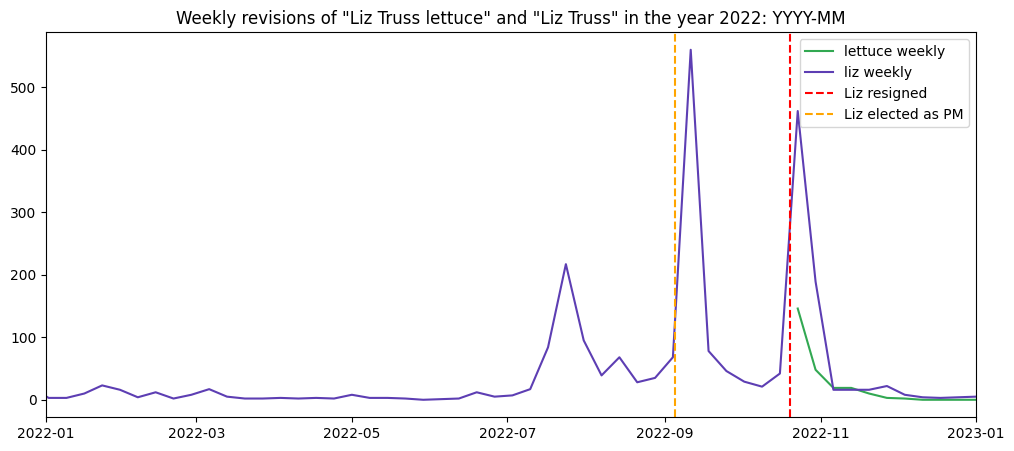

In [18]:
# Weekly

plt.figure(figsize = (12,5))

plt.plot(lettuce_df_week["timestamp"], lettuce_df_week["Frequency"], label = 'lettuce weekly', color="#32a852")
plt.plot(liz_truss_df_week["timestamp"], liz_truss_df_week["Frequency"], label = 'liz weekly', color ="#5d3eb3")

plt.xlim(pd.Timestamp("2022-01-01"), pd.Timestamp("2023-01-01"))

plt.title('Weekly revisions of "Liz Truss lettuce" and "Liz Truss" in the year 2022: YYYY-MM')

# Plot a vertical line showing the day Liz resigned (20 Oct 2022)
plt.axvline(pd.Timestamp("2022-10-20"), color ="red", linestyle="--", label = "Liz resigned")

# Plot a vertical line showing the day Liz elected as PM (5 Sep 2022)
plt.axvline(pd.Timestamp("2022-09-05"), color ="orange", linestyle="--", label = "Liz elected as PM")

plt.legend()

plt.show()

### Fig 3. Monthly revisions of "Liz Truss lettuce" and "Liz Truss" on Wikipedia in the year 2022: YYYY-MM')

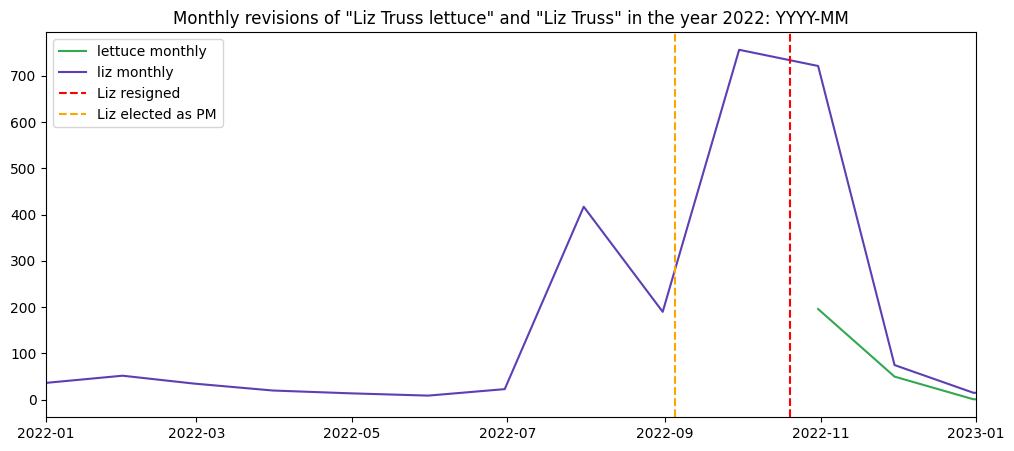

In [19]:
# Monthly

plt.figure(figsize = (12,5))

plt.plot(lettuce_df_month["timestamp"], lettuce_df_month["Frequency"], label = 'lettuce monthly', color="#32a852")
plt.plot(liz_truss_df_month["timestamp"], liz_truss_df_month["Frequency"], label = 'liz monthly', color ="#5d3eb3")

plt.xlim(pd.Timestamp("2022-01-01"), pd.Timestamp("2023-01-01"))

plt.title('Monthly revisions of "Liz Truss lettuce" and "Liz Truss" in the year 2022: YYYY-MM')

# Plot a vertical line showing the day Liz resigned (20 Oct 2022)
plt.axvline(pd.Timestamp("2022-10-20"), color ="red", linestyle="--", label = "Liz resigned")

# Plot a vertical line showing the day Liz elected as PM (5 Sep 2022)
plt.axvline(pd.Timestamp("2022-09-05"), color ="orange", linestyle="--", label = "Liz elected as PM")

plt.legend()

plt.show()

# Zooming into the week before and after Liz Truss resigned (13 Oct 2022 - 27 Oct 2022)
Liz Truss resigned on 20 Oct 2022

### Fig 4. Daily revisions of "Liz Truss lettuce" and "Liz Truss" on Wikipedia from 13 Oct 2022 to 10 Nov 2022: YYYY-MM

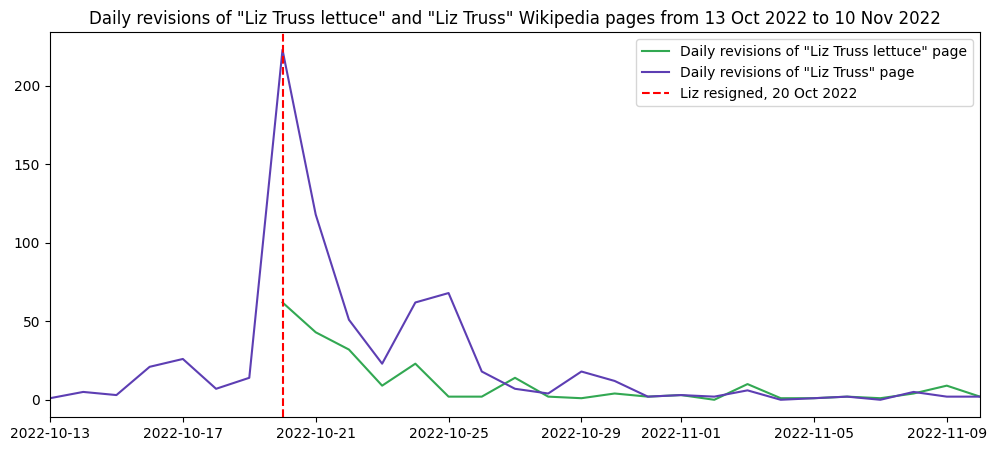

In [127]:
# Daily

plt.figure(figsize = (12,5))

plt.plot(lettuce_df_day["timestamp"], lettuce_df_day["Frequency"], label = 'Daily revisions of "Liz Truss lettuce" page', color="#32a852")
plt.plot(liz_truss_df_day["timestamp"], liz_truss_df_day["Frequency"], label = 'Daily revisions of "Liz Truss" page', color ="#5d3eb3")

plt.xlim(pd.Timestamp("2022-10-13"), pd.Timestamp("2022-11-10"))

plt.title('Daily revisions of "Liz Truss lettuce" and "Liz Truss" Wikipedia pages from 13 Oct 2022 to 10 Nov 2022')


# Plot a vertical line showing the day Liz resigned (20 Oct 2022)
plt.axvline(pd.Timestamp("2022-10-20"), color ="red", linestyle="--", label = "Liz resigned, 20 Oct 2022")

plt.legend()

plt.show()

### Verifying whether the maximum point of `liz daily` occurred on the same day as the start of `lettuce daily`
This is because they appear to be on the same day

In [33]:
from datetime import datetime

In [64]:
# Verifying whether the maximum point of `liz daily` occurred on the same day as the start of `lettuce daily`

# Find start of `lettuce daily`

print(f"Day of first appearance of 'Liz Truss lettuce' on Wikipedia: {df_lettuce["timestamp"].min()}")

# Find peak of `liz daily`

max_liz = liz_truss_df_day[liz_truss_df_day["Frequency"] == liz_truss_df_day["Frequency"].max()]["timestamp"]

print(f"\nDay at which the 'Liz Truss' Wikipedia page had the most revisions is: {max_liz.iloc[0]}")

Day of first appearance of 'Liz Truss lettuce' on Wikipedia: 2022-10-20 14:52:50+00:00

Day at which the 'Liz Truss' Wikipedia page had the most revisions is: 2022-10-20 00:00:00+00:00


### Describing Fig 4

**Description**
From Figure 4, and the subsequent verification, we identify that Liz Truss' resignation on 2022-10-20 (20th October 2022) coincided with the formation of the meme page (Liz Truss lettuce) as well as a spike in the number of revisions to Liz Truss' wikipedia page to its highest level (see Fig 1).

**Limitation**
However, at this moment, we are unable to isolate the effect of Liz Truss' resignation from the formation of the meme page in terms of their contribution to the number of revisions to Liz Truss' Wikipedia page

**Proposed solution**
Hence, seeking to isolate them, we use Liz Truss' official election (05 Sep 2022) as Prime Minister as a proxy, 

- On the assumption that her ascension to the PM office should draw the same amount of political attention as her resignation, leading to approximately the same increase in frequency of revision to her Wikipedia page

- Consequently, any difference from this increase in frequency can be associated with the effect of the meme



In [79]:
# Difference between Frequency of Revisions for Liz Truss page, on 20 Oct 2022 vs 19 Oct 2022

print("\nDuring Liz Truss' resignation from PM on 20 Oct 2022...")

liz_19oct_frequency = liz_truss_df_day[liz_truss_df_day["timestamp"] == '2022-10-19']["Frequency"]
print(f"\nNumber of Revisions for Liz Truss page on 19 Oct 2022: {liz_19oct_frequency.iloc[0]}")

liz_20oct_frequency = liz_truss_df_day[liz_truss_df_day["timestamp"] == '2022-10-20']["Frequency"]
print(f"Number of Revisions for Liz Truss page on 20 Oct 2022: {liz_20oct_frequency.iloc[0]}")


print(f"Difference between Frequency of Revisions for Liz Truss page, on 20 Oct 2022 vs 19 Oct 2022: \
      {liz_20oct_frequency.iloc[0] - liz_19oct_frequency.iloc[0]}")



# Difference between Frequency of Revisions for Liz Truss page, on 05 Sep 2022 vs 04 Sep 2022

print("-----")

print("\nDuring Liz Truss' election as PM on 05 Sep 2022...")

liz_04sep_frequency = liz_truss_df_day[liz_truss_df_day["timestamp"] == '2022-09-04']["Frequency"]
print(f"\nNumber of Revisions for Liz Truss page on 04 Sep 2022: {liz_04sep_frequency.iloc[0]}")

liz_05sep_frequency = liz_truss_df_day[liz_truss_df_day["timestamp"] == '2022-09-05']["Frequency"]
print(f"Number of Revisions for Liz Truss page on 05 Sep 2022: {liz_05sep_frequency.iloc[0]}")


print(f"Difference between Frequency of Revisions for Liz Truss page, on 05 Sep 2022 vs 04 Sep 2022: \
      {liz_05sep_frequency.iloc[0] - liz_04sep_frequency.iloc[0]}")


During Liz Truss' resignation from PM on 20 Oct 2022...

Number of Revisions for Liz Truss page on 19 Oct 2022: 14
Number of Revisions for Liz Truss page on 20 Oct 2022: 223
Difference between Frequency of Revisions for Liz Truss page, on 20 Oct 2022 vs 19 Oct 2022:       209
-----

During Liz Truss' election as PM on 05 Sep 2022...

Number of Revisions for Liz Truss page on 04 Sep 2022: 11
Number of Revisions for Liz Truss page on 05 Sep 2022: 171
Difference between Frequency of Revisions for Liz Truss page, on 05 Sep 2022 vs 04 Sep 2022:       160


In [87]:
# On the assumption that the political attention (captured via Wikipedia revisions) 
# following Liz Truss' resignation is equal to that following Liz Truss' employment


# Theoretical value of Liz Truss' Wikipedia page following her resignation, assume absence of lettuce meme

theoretical_liz_20oct = liz_19oct_frequency.iloc[0] + (liz_05sep_frequency.iloc[0] - liz_04sep_frequency.iloc[0])

print(f'''Theoretical frequency of revisions to Liz Truss' Wikipedia page following her resignation, 
      assume absence of lettuce meme :{theoretical_liz_20oct}''')


# Difference between actual and theoretical frequency of revisions to Liz Truss' Wikipedia page following her resignation

print(f'''\nDifference between actual and theoretical frequency of revisions to Liz Truss' Wikipedia page 
      following her resignation: {liz_20oct_frequency.iloc[0] - theoretical_liz_20oct}''')





Theoretical frequency of revisions to Liz Truss' Wikipedia page following her resignation, 
      assume absence of lettuce meme :174

Difference between actual and theoretical frequency of revisions to Liz Truss' Wikipedia page 
      following her resignation: 49


### Plotting a graph to highlight the difference

In [89]:
# Frequency of revision on 04 Sep 2022 (D-1 before Liz Truss' election to PM)

freq_04sep = liz_truss_df_day[liz_truss_df_day["timestamp"] == "2022-09-04"]["Frequency"]

# Frequency of revision on 05 Sep 2022 (Liz Truss' election to PM)

freq_05sep = liz_truss_df_day[liz_truss_df_day["timestamp"] == "2022-09-05"]["Frequency"]

# Frequency of revision on 19 Oct 2022 (D-1 before Liz Truss' resignation from PM)

freq_19oct = liz_truss_df_day[liz_truss_df_day["timestamp"] == "2022-10-19"]["Frequency"]

# Frequency of revision on 20 Oct 2022 (Liz Truss' resignation from PM)

freq_20oct = liz_truss_df_day[liz_truss_df_day["timestamp"] == "2022-10-20"]["Frequency"]

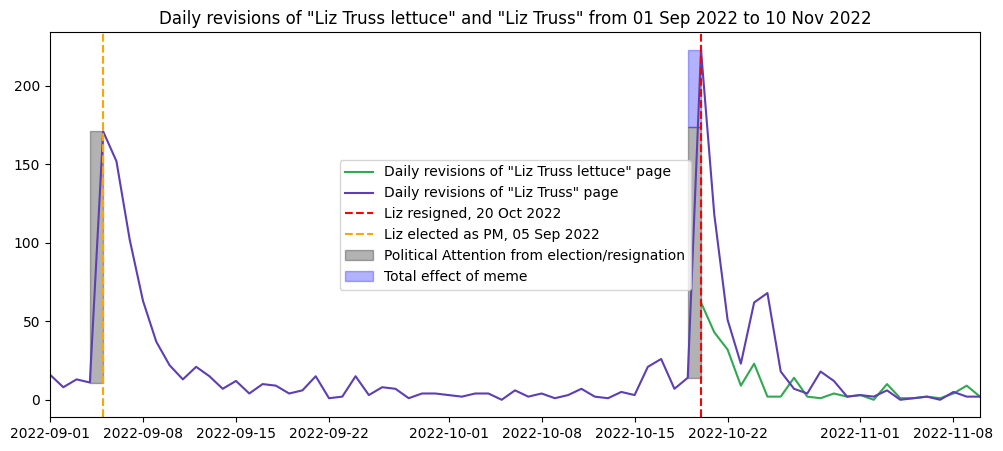

In [125]:
# Plotting a graph to highlight the difference

plt.figure(figsize = (12,5))

plt.plot(lettuce_df_day["timestamp"], lettuce_df_day["Frequency"], label = 'Daily revisions of "Liz Truss lettuce" page', color="#32a852")
plt.plot(liz_truss_df_day["timestamp"], liz_truss_df_day["Frequency"], label = 'Daily revisions of "Liz Truss" page', color ="#5d3eb3")

plt.xlim(pd.Timestamp("2022-09-01"), pd.Timestamp("2022-11-10"))

plt.title('Daily revisions of "Liz Truss lettuce" and "Liz Truss" from 01 Sep 2022 to 10 Nov 2022')


# Plot a vertical line showing the day Liz resigned (20 Oct 2022)
plt.axvline(pd.Timestamp("2022-10-20"), color ="red", linestyle="--", label = "Liz resigned, 20 Oct 2022")

# Plot a vertical line showing the day Liz elected as PM (05 Sep 2022)
plt.axvline(pd.Timestamp("2022-09-05"), color ="orange", linestyle="--", label = "Liz elected as PM, 05 Sep 2022")


# Create box showing effect of election
plt.fill_between(
    x=[pd.Timestamp("2022-09-04"), pd.Timestamp("2022-09-05")], 
    y1=freq_04sep, y2=freq_05sep, 
    color="black", alpha=0.3, label = "Political Attention from election/resignation"
)

# Create box showing Political Attention effect of resignation
plt.fill_between(
    x=[pd.Timestamp("2022-10-19"), pd.Timestamp("2022-10-20")], 
    y1=freq_19oct, y2=theoretical_liz_20oct, 
    color="black", alpha=0.3
)


# Create box showing effect of meme
plt.fill_between(
    x=[pd.Timestamp("2022-10-19"), pd.Timestamp("2022-10-20")], 
    y1=theoretical_liz_20oct, y2=freq_20oct, 
    color="blue", alpha=0.3, label = "Total effect of meme"
)

plt.legend(loc = "best")

plt.show()

# Conclusion

Given that the difference between actual and theoretical frequency of revisions to Liz Truss' Wikipedia page following her resignation is 49 > 0, we can infer that there is a fair likelihood that the 'Liz Truss lettuce' meme had a positive effect in boosting the number of revisions to Liz Truss' Wikipedia page.

# Plot the data

In [ ]:
# Create 3 plots with moving average for Weekly, Monthly, Yearly 
fig = wtp.plot_revision_counts(
    df=df_liz,
    article_name="Data",
    moving_average=True)

# Plot Histogram of data

In [ ]:
# Plot histogram

df_liz["timestamp"].dt.month.hist()

plt.show()